<a href="https://colab.research.google.com/github/eunhaday/AIFFEL_quest_cr/blob/master/Exploration/SQUest27/exp06_ControlNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ControlNet으로 조건을 준 이미지 생성

* Stable Diffusion은 텍스트 프롬프트 또는 입력 이미지를 통하여 이미지를 생성
  - 생성된 이미지를 원하는 대로 출력하기 어렵다

* ControlNet : Diffusion 모델에 추가 조건을 추가하여 출력되는 이미지를 쉽게 제어할 수 있다
  - 훈련 데이터가 작아도 학습이 잘 되고 빠르다는 장점이 있어 개인용 기기에서 사용할 수 있다는 장점
  - 외곽선 감지(Canny Edge detection),
  - 인체 자세 감지(Human pose),
  - 낙서 지도(Scribble map),
  - 시맨틱 세그멘테이션(Semantic segmentation) 등
  - 다양한 전처리기(Preprocessor)를 Stable Diffusion 모델에 도입할 수 있다.

* ControlNet을 사용하여 이미지 제어 방법 익히기

#### 라이브러리 설치

In [18]:
# Stable Diffusion 설치
!pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [10]:
# 이미지를 생성하다 보면 CUDA out of memery가 나올 때 이용
# 메모리 삭제
#torch.cuda.empty_cache()

#### 윤곽선 검출 (Canny 알고리즘)

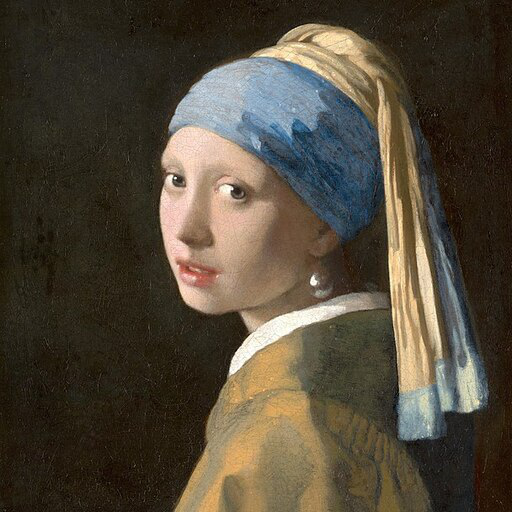

In [11]:
import torch
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image

# 이미지 불러오기
image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)

image

In [12]:
# 이미지 저장
image.save(f"/content/drive/MyDrive/Colab Notebooks/aiffel_ControlNet/input_image_vermeer.png")

#### OpenCV를 사용하여 이미지의 윤곽선을 검출

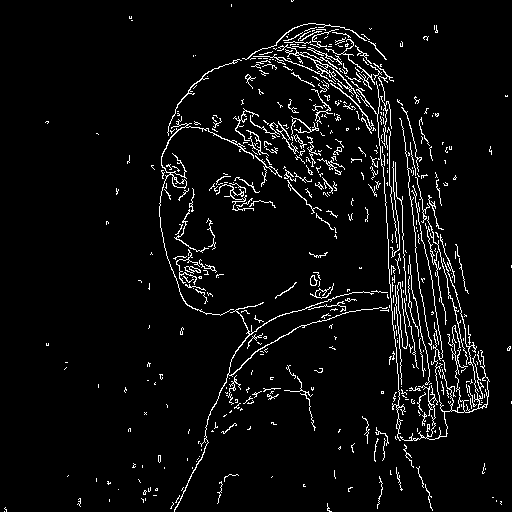

In [13]:
import cv2
from PIL import Image
import numpy as np

# 이미지를 NumPy 배열로 변환합니다.
image = np.array(image)

# threshold를 지정합니다.
low_threshold = 100
high_threshold = 200

# 윤곽선을 검출합니다.
image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)  # NumPy 배열을 PIL 이미지로 변환합니다.

canny_image

In [14]:
# 이미지를 파일로 저장합니다.
canny_image.save(f"/content/drive/MyDrive/Colab Notebooks/aiffel_ControlNet/canny_image.png")  # "canny_image.png"라는 파일로 저장

#### 윤곽선 검출 전처리기를 사용한 모델 파이프라인을 불러오기

In [15]:
# 윤곽선 검출 전처리기를 사용한 모델 파이프라인을 불러오기

from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
canny_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=canny_controlnet, torch_dtype=torch.float16
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

#### 윤곽선을 추출한 이미지에 프롬프트를 적용하여 새로운 이미지를 생성

In [17]:
# 윤곽선을 추출한 이미지에 프롬프트를 적용하여 새로운 이미지를 생성

from diffusers import UniPCMultistepScheduler
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 동일한 이미지를 생성하기 위해 seed를 지정합니다.
generator = torch.manual_seed(0)

# 이미지를 생성합니다.
canny_image = canny_pipe(
    prompt="disco dancer with colorful lights",   #다채로운 조명을 갖춘 디스코 댄서
    num_inference_steps=20,
    generator=generator,
    image=canny_image
).images[0]

# 생성된 이미지를 저장합니다.
canny_image.save(f"/content/drive/MyDrive/Colab Notebooks/aiffel_ControlNet/canny_image_new.png")

# 생성된 이미지를 출력합니다.
canny_image

  0%|          | 0/20 [00:00<?, ?it/s]

KeyboardInterrupt: 

#### 부정적인 프롬프트(negative_propmt) 이용
 * negative_propmt : 원하지 않는 요소를 기록

#### 하이퍼 파라미터를 조절
 * controlnet_conditioning_scale : ContorlNet으로 조건을 어느 정도 주느냐를 조절
    - Default는 1이고, 실수값으로 설정
 * num_inference_steps : 추론 횟수 (값이 커질수록 고해상도 이미지가 출력,
     default 값은 50)
 * guidance_scale : 얼마나 주어진 프롬프트에 근접한 이미지를 생성할지를 설정,  
    값이 커질수록 문자열에 근접한 이미지가 생성, default는 7.5

  0%|          | 0/20 [00:00<?, ?it/s]

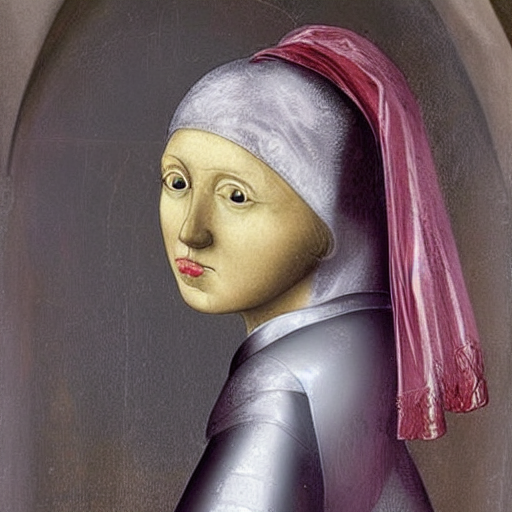

In [ ]:
# 직접 조정하여 생성

import torch
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image

import cv2
from PIL import Image
import numpy as np

# 이미지 불러오기
image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)

image

# 이미지를 NumPy 배열로 변환합니다.
image = np.array(image)

# threshold를 지정합니다.
low_threshold = 100
high_threshold = 200

# 윤곽선을 검출합니다.
image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)  # NumPy 배열을 PIL 이미지로 변환합니다.

canny_image

# 윤곽선을 추출한 이미지에 프롬프트를 적용하여 새로운 이미지를 생성
from diffusers import UniPCMultistepScheduler
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

# 동일한 이미지를 생성하기 위해 seed를 지정합니다.
generator = torch.manual_seed(0)

# 이미지를 생성합니다.
canny_image = canny_pipe(
    prompt="The beautiful daughter of a medieval count",
    negative_prompt="low quality, blurry, dark, noisy",
    #"The beautiful daughter of a medieval count",
    #"Rock singer style look",
    #"A girl with a permed bob and deep eyes, Nallari style",  #그윽한 눈을 가진 뽀글머리 파마한 날라리 아가씨스타일
    #"A girl with a permed bob and a frizzy hair style",  #뽀글머리 파마한 날라리 아가씨스타일
    #"The image of a gorgeous Arabian Nights princess with big, bright eyes",   #아라비안나이트의 화려한 공주이미지
    #num_inference_steps=50,
    num_inference_steps=20,
    generator=generator,
    #guidance_scale=3.5,
    image=canny_image
).images[0]

# 생성된 이미지를 저장합니다.
canny_image.save(f"/content/drive/MyDrive/Colab Notebooks/aiffel_ControlNet/canny_image_new9_1.png")

# 생성된 이미지를 출력합니다.
canny_image

In [ ]:
# ChatGPT를 이용하여 생성

#### 인체 자세 감지
 * Openpose는 인체 자세 감지(Human pose)를 할 수 있는 전처리기
 * 자세를 감지하여 새로운 이미지를 생성

In [22]:
# controlnet-aux를 설치합니다. Human pose를 검출해주는 controlnet의 보조용 모델입니다.
!pip install controlnet-aux==0.0.1

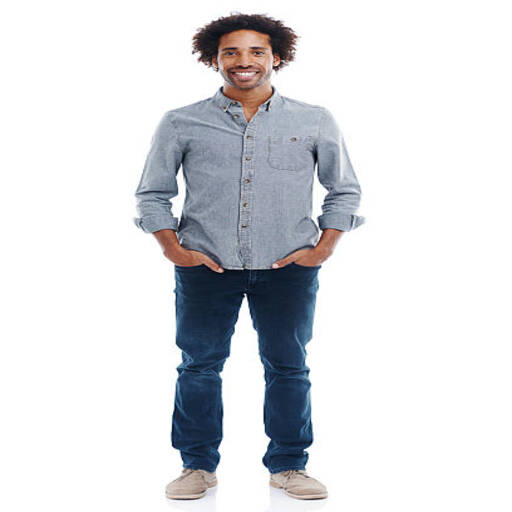

In [23]:
#사람의 전신이 담긴 이미지 로딩

from diffusers.utils import load_image

openpose_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png"
)
openpose_image

In [24]:
# 생성된 이미지를 저장합니다.
openpose_image.save(f"/content/drive/MyDrive/Colab Notebooks/aiffel_ControlNet/openpose_image3.png")

#### Openpose 검출기를 사용하면 자세만 추출

body_pose_model.pth:   0%|          | 0.00/209M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/controlnet_aux/open_pose/body.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = util.transfer(self.model, torch.load(

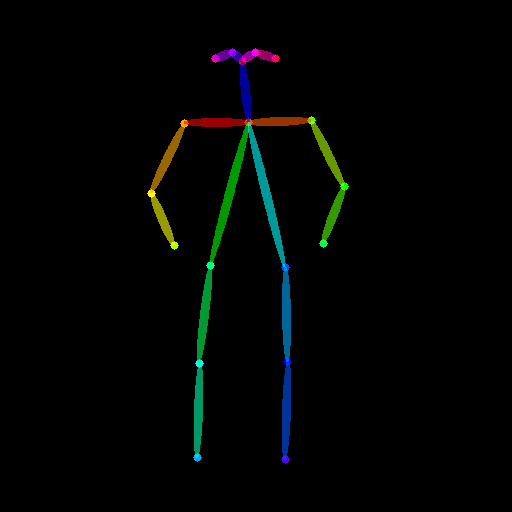

In [25]:
# Openpose 검출기를 사용하면 자세만 추출

from controlnet_aux import OpenposeDetector

# 인체의 자세를 검출하는 사전 학습된 ControlNet 불러오기
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

# 이미지에서 자세 검출
openpose_image = openpose(openpose_image)
openpose_image

In [26]:
# 생성된 이미지를 저장합니다.
openpose_image.save(f"/content/drive/MyDrive/Colab Notebooks/aiffel_ControlNet/openpose_image4.png")

#### Openpose 전처리기를 사용한 모델 파이프라인을 불러오기

In [27]:
# Openpose 전처리기를 사용한 모델 파이프라인을 불러오기

from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

openpose_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
openpose_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=openpose_controlnet, torch_dtype=torch.float16
)

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

#### 새로운 이미지를 생성

In [28]:
from diffusers import UniPCMultistepScheduler

openpose_pipe.scheduler = UniPCMultistepScheduler.from_config(openpose_pipe.scheduler.config)
openpose_pipe = openpose_pipe.to("cuda")

# Q. 코드를 작성해 보세요.
# 동일한 이미지를 생성하기 위해 seed를 넣어줍니다.
generator = torch.manual_seed(0)

#프롬프트를 작성합니다.
prompt =  "A pose of a knight fighting an enemy in the Middle Ages"  #중세시대 적군과 싸우는 기사의포즈
#negative_prompt =  "low quality, blurry, dark, noisy"

images = openpose_image

# 이미지를 생성합니다.
openpose_image1 = openpose_pipe(
    prompt=prompt,
    #negative_prompt=negative_prompt,
    num_inference_steps=20,
    generator=generator,
    image=openpose_image
).images[0]

# 생성된 이미지를 저장합니다.
openpose_image1.save(f"/content/drive/MyDrive/Colab Notebooks/aiffel_ControlNet/openpose_image1.png")  #negative_prompt 값이 없는 경우
#openpose_image1.save(f"/content/drive/MyDrive/Colab Notebooks/aiffel_ControlNet/openpose_image2.png")  #negative_prompt 값이 있는 경우

# 생성된 이미지를 출력합니다.
openpose_image1

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

#### 윤곽선 검출 + 인체 자세 감지

* 2가지의 전처리기를 동시에 사용
* controlnets라는 리스트로 만들어 파이프라인으로 전달

#### Canny 알고리즘을 사용한 윤곽선 검출
* Canny 알고리즘으로 윤곽선을 검출
* 이미지 위에 인체 자세 검출 전처리기를 올려줄 것
* 인체 자세를 넣어줄 부분을 이미지 내에서 지워주어야 한다는 점을 주의

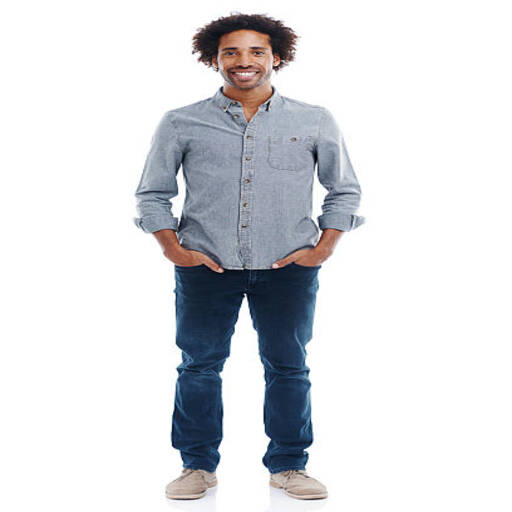

In [44]:
from diffusers.utils import load_image
from PIL import Image
import cv2
import numpy as np

# 이미지를 불러오세요.
canny_image = load_image("/content/drive/MyDrive/Colab Notebooks/aiffel_ControlNet/openpose_image3.png")
canny_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
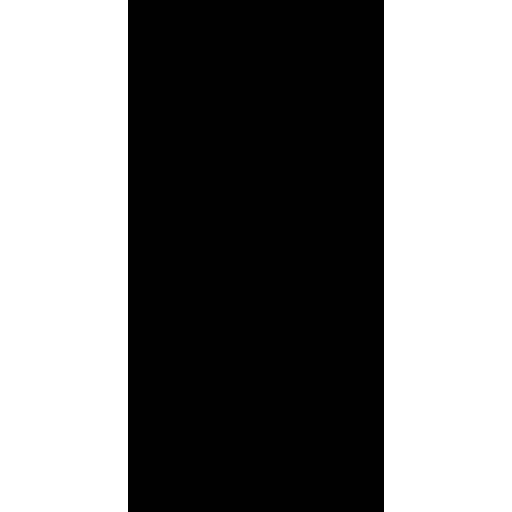

In [45]:
#threshhold를 지정합니다.
low_threshold = 100
high_threshold = 200

# 이미지를 NumPy 배열로 변환합니다.
canny_image = np.array(canny_image)

# 인체 감지 포즈를 넣어줄 가운데 부분을 지워줍니다.
zero_start = canny_image.shape[1] // 4
zero_end = zero_start + canny_image.shape[1] // 2
canny_image[:, zero_start:zero_end] = 0

canny_image

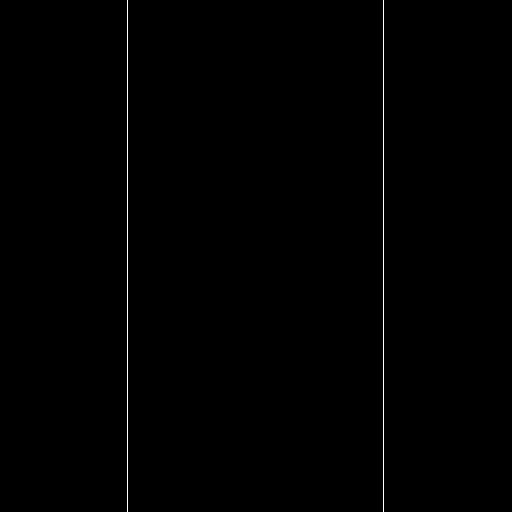

In [46]:
# 윤곽선을 검출하고 NumPy 배열을 PIL 이미지로 변환합니다.
canny_image = cv2.Canny(canny_image, low_threshold, high_threshold)
canny_image = canny_image[:, :, None]
canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)
canny_image = Image.fromarray(canny_image)  # NumPy 배열을 PIL 이미지로 변환합니다.
canny_image

#### Openpose를 사용한 인체 자세 검출

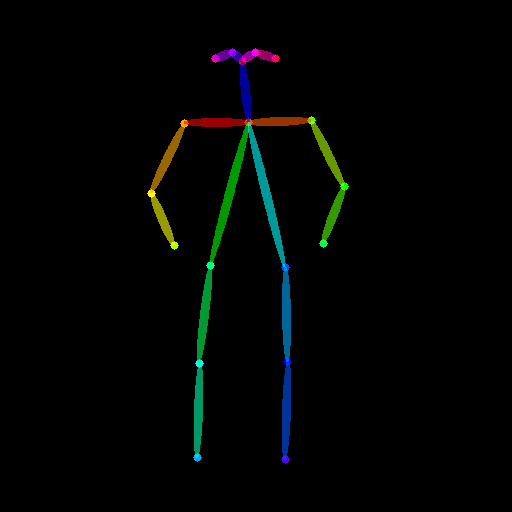

In [48]:
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image

# 이미지를 불러옵니다.
openpose_image = load_image("/content/drive/MyDrive/Colab Notebooks/aiffel_ControlNet/openpose_image3.png")

# OpenposeDetector를 사용하여 인체 자세를 검출합니다.
# 인체의 자세를 검출하는 사전 학습된 ControlNet 불러오기
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

# 이미지에서 자세 검출
openpose_image = openpose(openpose_image)

openpose_image


#### Edge Detection과 Openpose, 2개의 전처리기를 controlnets라는 리스트로 만들어 파이프라인으로 전달

In [2]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch

#Openpose 전처리기를 사용한 모델 파이프라인을 불러오기
# Edge Detection과 Openpose, 2개의 전처리기를 controlnets라는 리스트로 만듭니다.
controlnets = [ ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16),
    ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)]

# 리스트 controlnets를 파이프라인으로 전달합니다.
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnets, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

# 프롬프트를 작성합니다.
prompt =  "dancing black knight"
negative_prompt =  "low quality, blurry, dark, noisy"

# seed를 지정합니다.
generator = torch.manual_seed(100)

images = [openpose_image, canny_image]

# 이미지를 생성합니다.
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=20,
    generator=generator,
    image=images
).images[0]

# 생성된 이미지를 저장합니다.
image.save(f"/content/drive/MyDrive/Colab Notebooks/aiffel_ControlNet/multi_controlnet_output.png")

# 생성된 이미지를 출력합니다.
image

print("생성한 이미지를 올린 곳은 https://github.com/eunhaday/AIFFEL_quest_cr/blob/master/Exploration/SQUest27/exp06_ControlNet.ipynb 입니다.")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

# 회고
* 기능을 통해 이미지를 직접 눈으로 확인하고 결과를 볼수 있는게 너무 신기했다.
* openpose와 canny이미지를 어떻게 접목하는지 눈으로 봐도 잘 이해가 안되는부분이 많았다.
* 그래도 지금까지 노드중 가장 재미있는거 같다.